<a href="https://colab.research.google.com/github/shw9807/shw9807blog/blob/master/%ED%8E%AD%EA%B7%84%EB%AA%B8%EB%AC%B4%EA%B2%8C%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "[Colab] 펭귄 몸무게 예측"

- toc:true
- branch: master
- badges: true
- author: shw9807
- categories: [데이콘]

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 펭귄 몸무게 예측

## LIBRARY

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use("seaborn")

## DATA LOADING

In [37]:
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/펭귄몸무게/dataset.zip" -d "/content/drive/MyDrive/Colab Notebooks/펭귄몸무게"

In [38]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/펭귄몸무게/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/펭귄몸무게/test.csv")

In [39]:
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


- id : 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기 
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo) : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
- Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)

## DATA CLEANSING & ANALYSIS

In [40]:
#drop id column
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

In [41]:
train.shape,test.shape

((114, 10), (228, 9))

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [43]:
train.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [44]:
target = train['Body Mass (g)']
object_columns = ['Species','Island','Clutch Completion','Sex']
numerical_columns= ['Culmen Depth (mm)','Culmen Length (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']

### Object Columns

Species
Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64


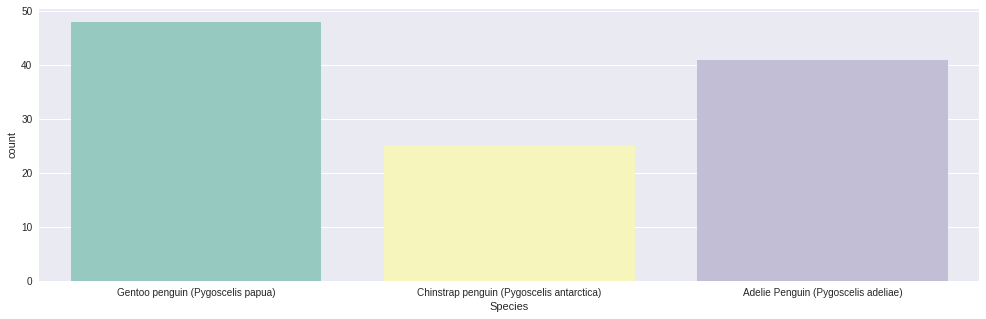

Island
Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64


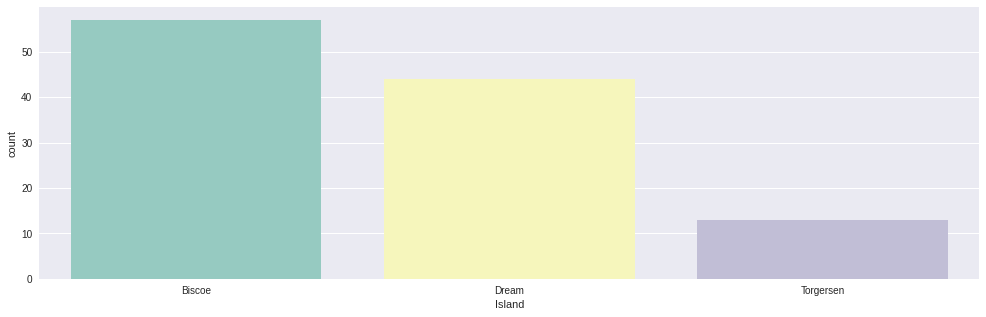

Clutch Completion
Yes    102
No      12
Name: Clutch Completion, dtype: int64


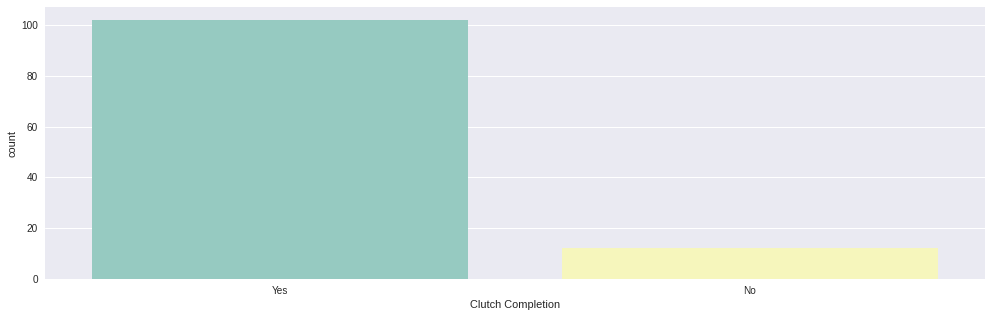

Sex
MALE      56
FEMALE    55
Name: Sex, dtype: int64


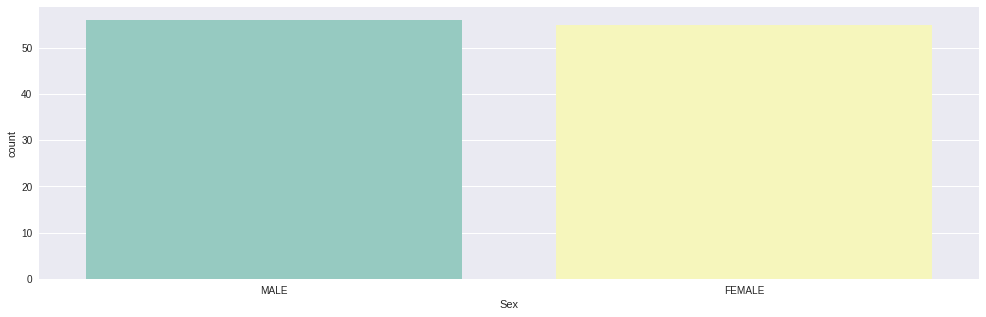

In [45]:
for _ in object_columns:
    print(_)
    print(train[_].value_counts())
    plt.figure(figsize=(15,5))
    sns.countplot(x=train[_],palette='Set3')
    plt.show()

### Numerical Columns

Culmen Depth (mm)


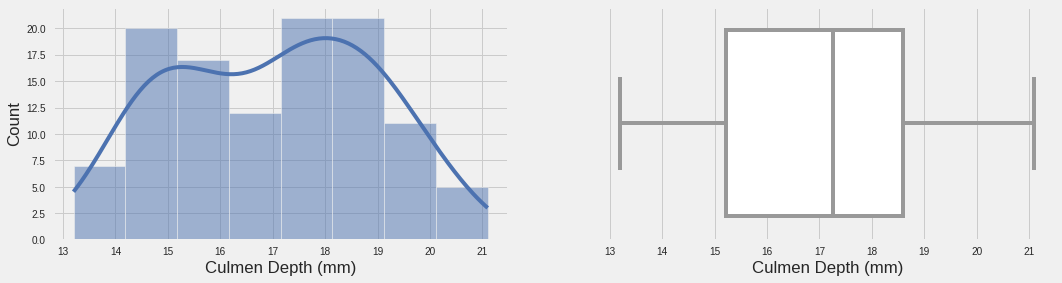

<Figure size 1080x360 with 0 Axes>

Culmen Length (mm)


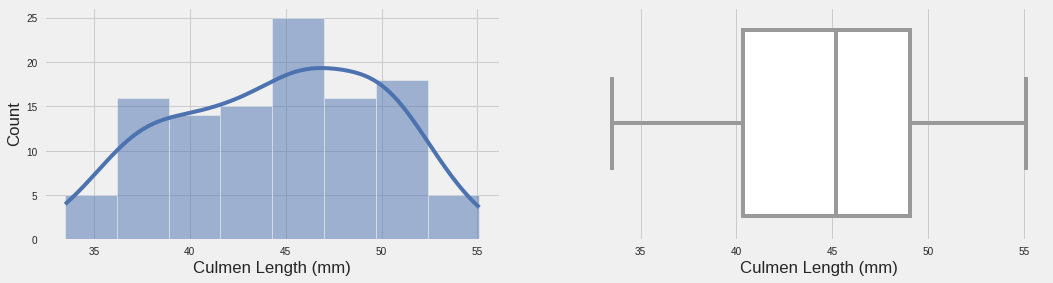

<Figure size 1080x360 with 0 Axes>

Flipper Length (mm)


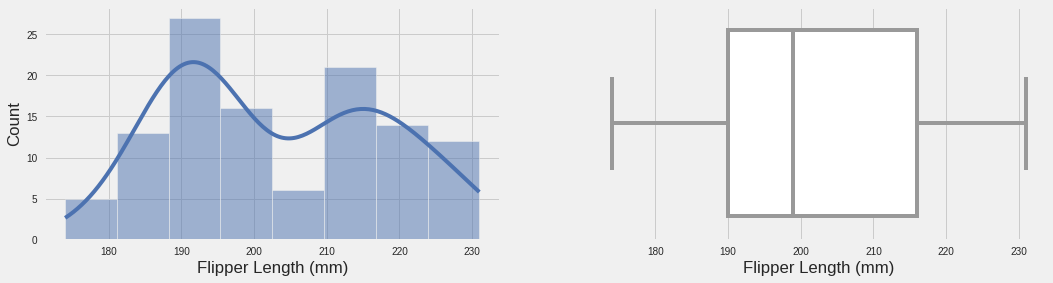

<Figure size 1080x360 with 0 Axes>

Delta 15 N (o/oo)


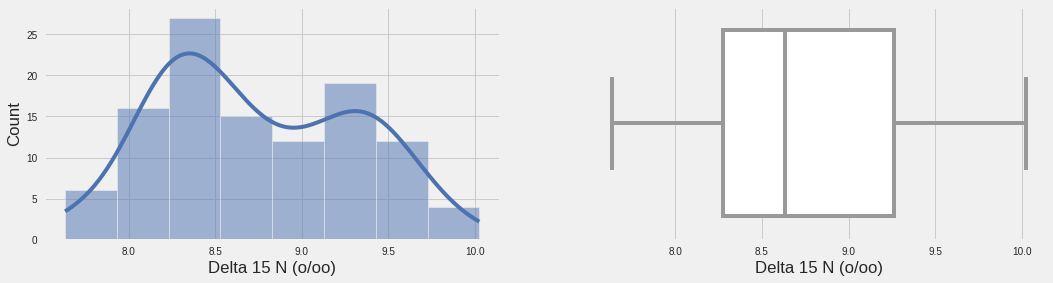

<Figure size 1080x360 with 0 Axes>

Delta 13 C (o/oo)


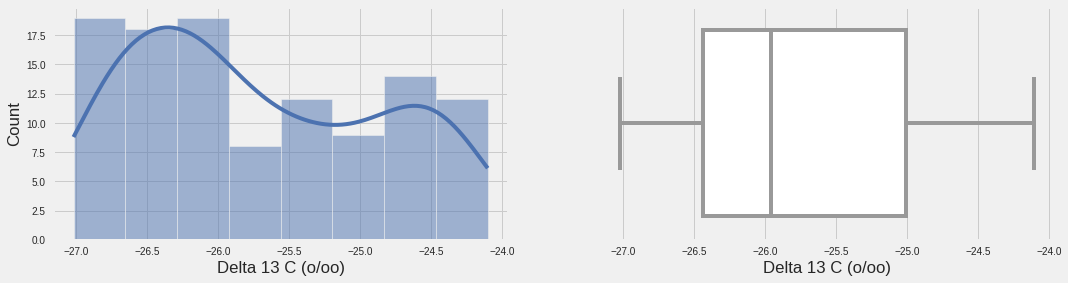

<Figure size 1080x360 with 0 Axes>

In [46]:
plt.style.use('fivethirtyeight')
for _ in numerical_columns:
    print(_)
    f,ax=plt.subplots(1,2,figsize=(16,4))
    plt.figure(figsize=(15,5))
    sns.histplot(x=train[_],ax=ax[0],kde=True)
    sns.boxplot(x=train[_],ax=ax[1],color='white')
    plt.show()

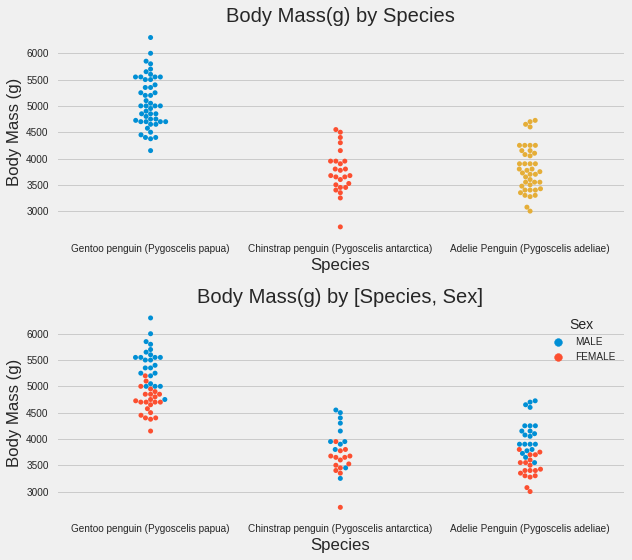

In [47]:
#Show 'Body Mass (g)' by Species. + 'Sex'
f,ax= plt.subplots(2,1,figsize=(9,8))
sns.swarmplot(data=train, x='Species',y='Body Mass (g)',ax=ax[0]);
ax[0].set_title("Body Mass(g) by Species")
sns.swarmplot(data=train, x='Species',y='Body Mass (g)',hue='Sex',ax=ax[1]);
ax[1].set_title("Body Mass(g) by [Species, Sex]")

plt.tight_layout() #Show clearly.

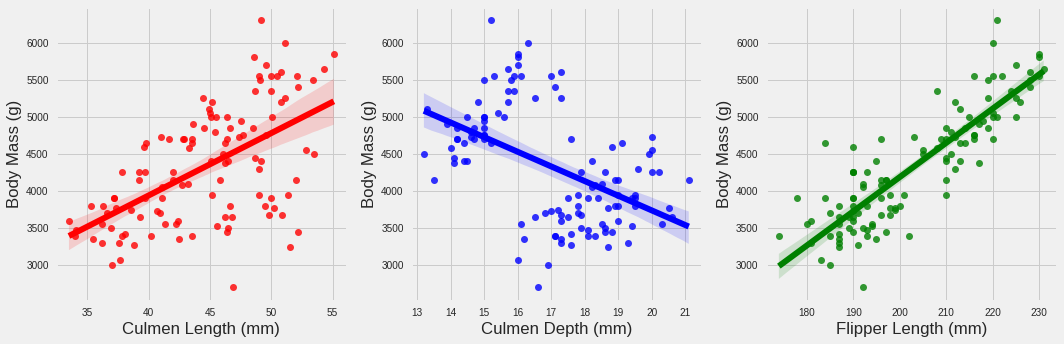

In [48]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.regplot(data=train, x='Culmen Length (mm)',y='Body Mass (g)',ax=ax[0],color='red')
sns.regplot(data=train, x='Culmen Depth (mm)',y='Body Mass (g)',ax=ax[1],color='blue')
sns.regplot(data=train, x='Flipper Length (mm)',y='Body Mass (g)',ax=ax[2],color='green')

plt.tight_layout()

### Observation

[Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm)] 컬럼들이 전반적으로 Body Mass (g)과 상관관계를 가진다고 할 수 있습니다.

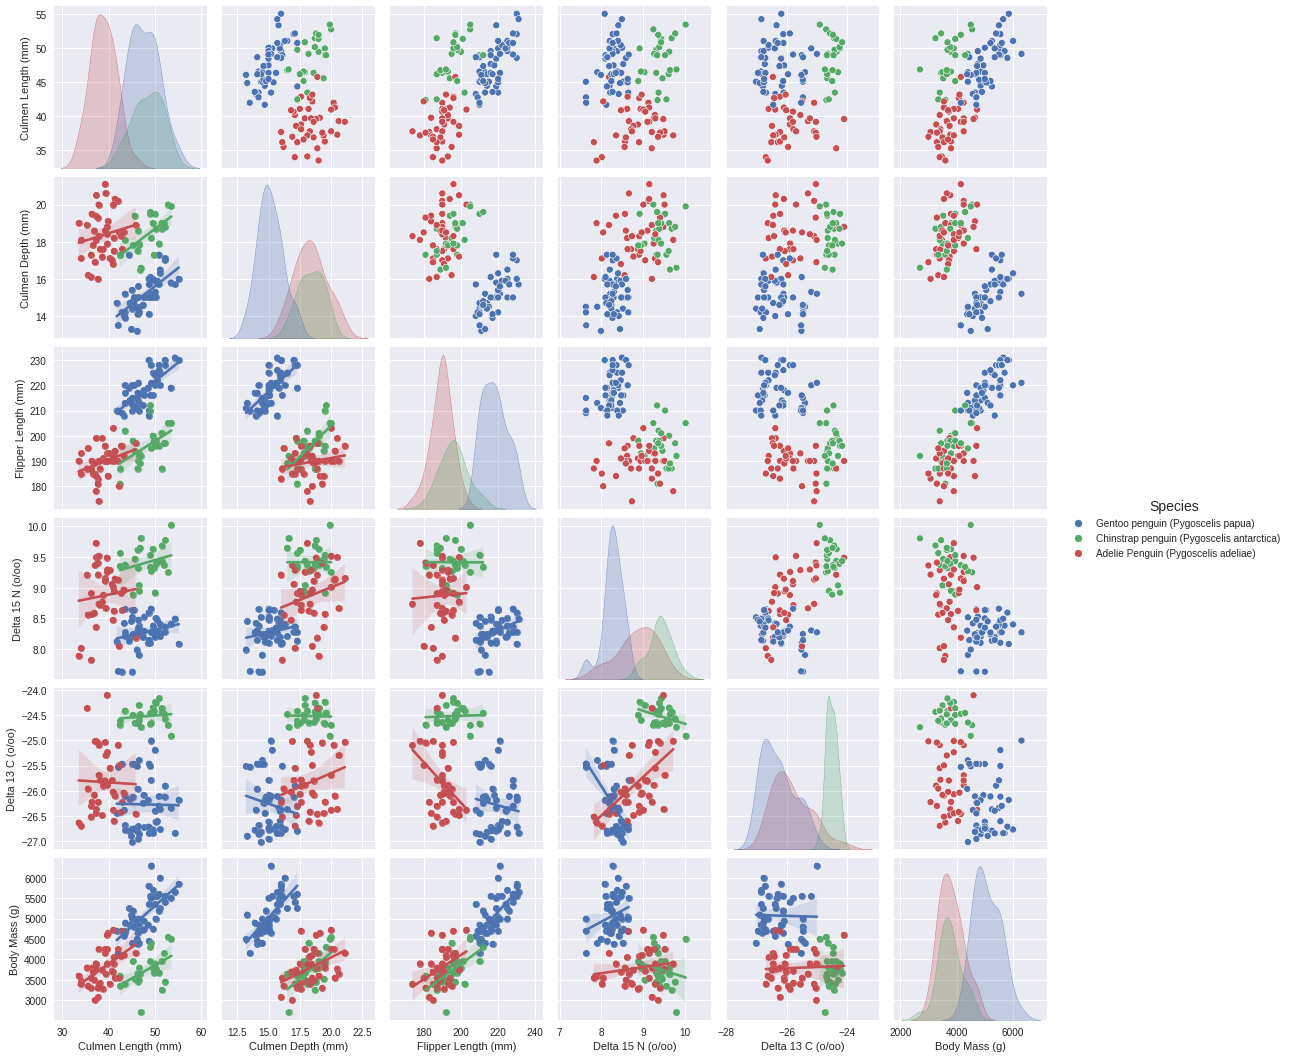

In [14]:
plt.style.use('seaborn')
g= sns.pairplot(train,hue='Species')
g.map_lower(sns.regplot);

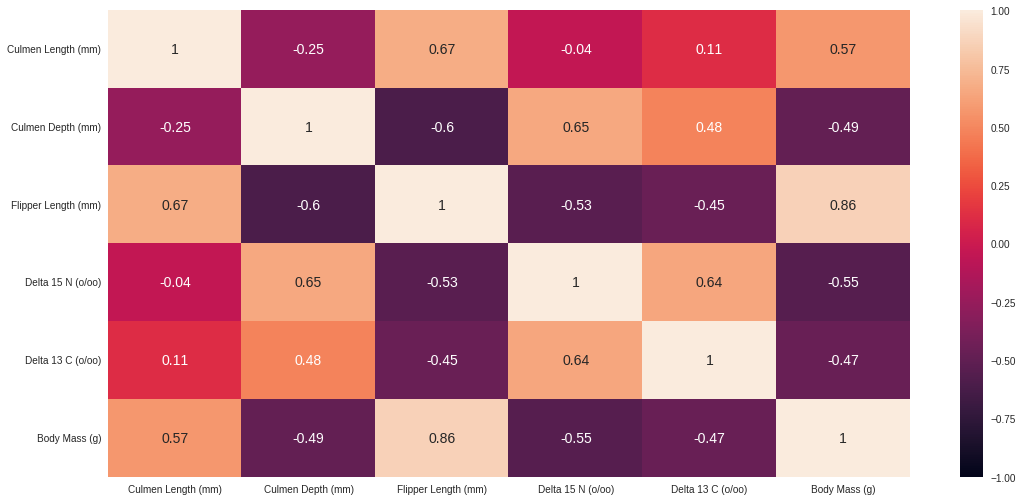

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,vmin=-1, vmax=1);

## Processing

### 결측값 처리

In [16]:
train.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

Delta 피쳐들은 평균으로 채워볼 수 있습니다..
또한, Sex 피쳐를 다루기 위해서 drop이나 mode로 채울 수 있습니다.
그러나 데이터가 적기 때문에 '합리적으로' 결측값을 채워봅시다.

In [17]:
train.corr()['Body Mass (g)']

Culmen Length (mm)     0.572063
Culmen Depth (mm)     -0.490643
Flipper Length (mm)    0.864814
Delta 15 N (o/oo)     -0.548678
Delta 13 C (o/oo)     -0.468425
Body Mass (g)          1.000000
Name: Body Mass (g), dtype: float64

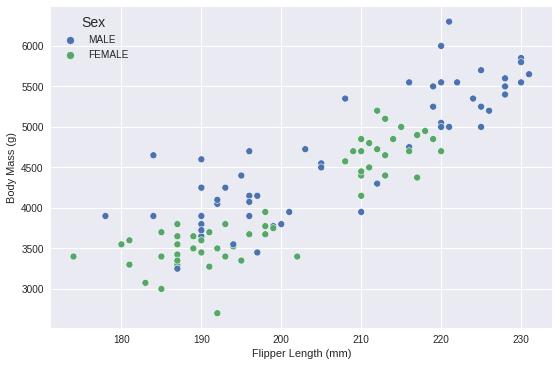

In [18]:
sns.scatterplot(data=train, x='Flipper Length (mm)', y= 'Body Mass (g)', hue='Sex');

Flipper Length (mm) & Body Mass (g)의 상관관계가 높은 것으로 보입니다.또한 성별로 나누었을 때도 구분이 됩니다.

In [19]:
train.groupby(['Species','Sex'])['Flipper Length (mm)'].mean().reset_index()

,Species,Sex,Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,187.166667
1,Adelie Penguin (Pygoscelis adeliae),MALE,191.619048
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,192.642857
3,Chinstrap penguin (Pygoscelis antarctica),MALE,200.454545
4,Gentoo penguin (Pygoscelis papua),FEMALE,213.217391
5,Gentoo penguin (Pygoscelis papua),MALE,223.000000


In [20]:
train[train['Sex'].isnull()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650


예를 들어, 6번의 인덱스를 보면. Adelie Penguin (Pygoscelis adeliae 종의 Flipper Length (mm)는 190입니다.
위의 표와 함께 유추하면, 성별은 'MALE'로 유추해볼 수 있습니다.

(결측값이 많을 때에는 좋은 방법이 아닐 겁니다.)

In [21]:
test.groupby(['Species','Sex'])['Flipper Length (mm)'].mean().reset_index()

,Species,Sex,Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,188.000000
1,Adelie Penguin (Pygoscelis adeliae),MALE,192.730769
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,191.100000
3,Chinstrap penguin (Pygoscelis antarctica),MALE,199.652174
4,Gentoo penguin (Pygoscelis papua),FEMALE,212.371429
5,Gentoo penguin (Pygoscelis papua),MALE,220.594595


In [22]:
test[test['Sex'].isnull()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
205,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180.0,NaN,NaN,NaN
209,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.3,216.0,NaN,7.96621,-25.69327


In [23]:
train.fillna(train.mean(), inplace = True)
test.fillna(train.mean(), inplace = True)

train.loc[6,'Sex']='MALE'
train.loc[8,'Sex']='MALE'
train.loc[70,'Sex']='FEMALE'

#test Dataset
test.loc[46,'Sex']='FEMALE'
test.loc[81,'Sex']='FEMALE'
test.loc[98,'Sex']='MALE' 
test.loc[152,'Sex']='MALE'
test.loc[205,'Sex']='FEMALE'
test.loc[209,'Sex']='FEMALE'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


### Encoding

In [24]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### Scale

In [25]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

train_scaler=ss.fit_transform(train[numerical_columns])
train[numerical_columns] = pd.DataFrame(data=train_scaler, columns=numerical_columns)

test_scaler= ss.transform(test[numerical_columns])
test[numerical_columns] = pd.DataFrame(data=test_scaler, columns=numerical_columns)

standardscaler를 사용해 수치형 칼럼들의 값을 평균0, 분산1로 조정해주었다.

## MODELING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,BayesianRidge

In [27]:
X=train.drop(['Body Mass (g)'],axis=1)
y= train['Body Mass (g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
import matplotlib.pyplot as plt

# alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트
train_score = []
test_score = []

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.01,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    train_score.append(ridge.score(X_train,y_train))
    test_score.append(ridge.score(X_test, y_test))

    neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 338.6389
alpha 값  0.01 일때 평균 rmse : 335.4318
alpha 값  0.1 일때 평균 rmse : 334.5428
alpha 값  1 일때 평균 rmse : 330.299
alpha 값  10 일때 평균 rmse : 328.4763
alpha 값  100 일때 평균 rmse : 404.5087


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


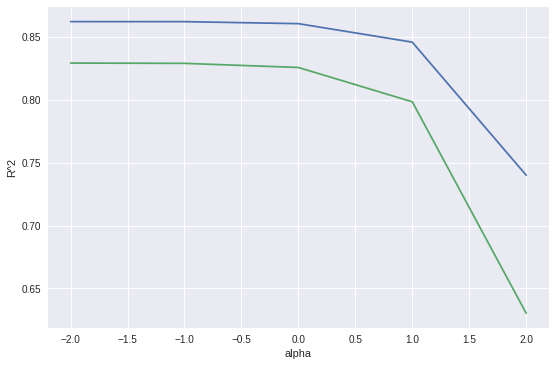

In [30]:
plt.plot(np.log10(alphas), train_score)
plt.plot(np.log10(alphas), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [31]:
#Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
pred= ridge.predict(X_test)
print(ridge.score(X_test,y_test))

0.8290727649695924


In [32]:
#Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
pred= ridge.predict(X_test)
print(ridge.score(X_test,y_test))

0.8255628368059518


## EVALUATION

In [33]:
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(y_test,pred)

314.79211507025894

In [34]:
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(y_test,pred)

314.79211507025894